# Distributions of Words & Sentences

This assignment is comprised of two tasks:

1. The first task is to compute the frequency vs. rank distribution of the words in Moby Dick. For this, you will need to tokenize the document and create a vocabulary mapping word types to their document frequency.
2. The second task is to segment the document into sentences and compute the sentence length distribution. Here you will experiment with spaCy's default sentence segmenter as well as the simple rule-based Sentencizer.

## Write Your Name Here: Shreyas Yermal Lokesha
## UNCC Id: 801210964
## UNCC E-mail Id: slokesha@uncc.edu

# <font color="blue"> Submission Instructions</font>

1. Click the Save button at the top of the Jupyter Notebook.
2. Please make sure to have entered your name above.
3. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of ll cells). 
4. Select Cell -> Run All. This will run all the cells in order, and will take several minutes.
5. Once you've rerun everything, select File -> Download as -> PDF via LaTeX and download a PDF version *distributions.pdf* showing the code and the output of all cells, and save it in the same folder that contains the notebook file *distributions.ipynb*.
6. Look at the PDF file and make sure all your solutions are there, displayed correctly. The PDF is the only thing we will see when grading!
7. Submit **both** your PDF and notebook on Canvas.

## Word distributions

First, create the spaCy tokenizer.

In [1]:
from spacy.lang.en import English
nlp = English()

tokenizer = nlp.tokenizer

Create a *vocab* dictionary. This dictionary will map tokens to their counts in the input text file.

In [2]:
vocab = {}

Read the input file line by line.

1. Tokenize each line.
2. For each token in the line that contains only letters, convert it to lower case and increment the corresponding count in the dictionary.
    - If the token does not exist in the dictionary yet, insert it with a count of 1. For example, the first time the token 'water' is encountered, the code should evaluate *vocab['water'] = 1*.

At the end of this code segment, *vocab* should map each word type to the number of times it appeared in the entire document. There should be 16830 word types and 214287 words in Moby Dick.

In [3]:
with open('../data/melville-moby_dick.txt', 'r') as f:
    for line in f:
        # YOUR CODE GOES HERE
        
        tokenset = tokenizer(line)
        for item in tokenset:
            if(item.is_alpha):
                x = item.text.lower()
                if(x in vocab.keys()):
                    vocab[x] += 1
                else:
                    vocab[x] = 1

print('There are', len(vocab), 'word types in Moby Dick.')
print('There are', sum(vocab.values()), 'words in Moby Dick.')

There are 16830 word types in Moby Dick.
There are 214287 words in Moby Dick.


Create a list *ranked* of tuples *(word, freq)* that contains all the words in the vocabulary *vocab* sorted by frequency. For example, if *vocab = {'duck':2, 'goose':5, 'turkey':3}*, then *ranked = [('goose', 5), ('turkey', 3), ('duck', 2)]*. 

In [47]:
ranked = [(a,b) for a,b in sorted(vocab.items(),key = lambda item:item[1], reverse = True)]# YOUR CODE GOES HERE
#rnktup = tuple({x:y for x,y in sorted(vocab.items(),key = lambda item:item[1] , reverse = True)})


Print the top 10 words in the sorted list.

In [48]:
print('Size of vocabulary:', len(ranked))
for word, freq in ranked[:10]:
    print(word, freq)

Size of vocabulary: 16830
the 14388
of 6606
and 6414
a 4698
to 4618
in 4164
that 3061
his 2527
it 2489
i 2068


Plot the frequency vs. rank of all the words in Moby Dick.

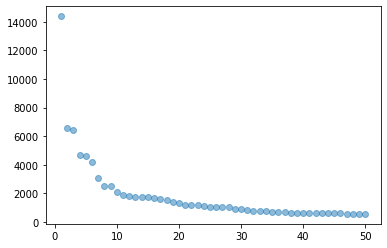

In [49]:
import matplotlib.pyplot as plt
ranks = range(1, 50 + 1)
freqs = [t[1] for t in ranked[:50]]
plt.scatter(ranks, freqs, c='#1f77b4', alpha=0.5)
plt.show()

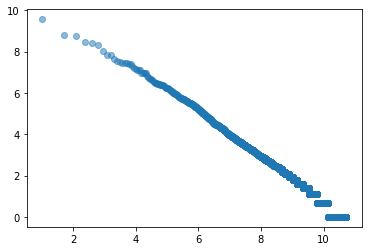

In [50]:
import math
ranks = [1 + math.log(r) for r in range(1, len(ranked) + 1)]
freqs = [math.log(t[1]) for t in ranked]
plt.scatter(ranks, freqs, c='#1f77b4', alpha=0.5)
plt.show()

## Sentence distributions

First, try to create the spaCy nlp object from the entire text of Moby Dick. This will likely not work, it is not a good idea to read all the text.

In [51]:
import spacy
nlp = spacy.load("en_core_web_sm")
text = open('../data/melville-moby_dick.txt', 'r').read()
doc = nlp(text)

ValueError: [E088] Text of length 1220066 exceeds maximum of 1000000. The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

Instead, read the document paragraph by paragraph, i.e. in chunks of text separated by empty lines. Segment each paragraph into sentences. For each sentence in the paragraph append its length (in tokens) to *lengths*. Use the default *nlp* class to process each paragraph and split it into sentences. Stop after processing 1000 paragraphs. This will be slow, so be patient.

In [4]:
import re
import spacy
import matplotlib.pyplot as plt
nlp = spacy.load("en_core_web_sm")

# the number of paragraphs read so far.
count = 0 
# stores the length of each sentence processed so far.
lengths = []
# make sure the file is read line by line.
with open('../data/melville-moby_dick.txt', 'r') as f:
    # YOUR CODE GOES HERE
    i = 0
    docData = f.read()
    paragraphData = re.split(r'\n\n+',docData)
    while (count <= 1000):
        for pdata in paragraphData:
            count += 1
            sentence = re.split(r' *[\.\?!][\'"\)\]]* *',pdata)
            for sent in sentence:
                tokenset = nlp(sent)
                tokCounter = 0
                for token in tokenset:
                    if(i<150):
                       # print(token)
                       
                    
#len150 = [l for l in lengths if l <= 150]
#plt.hist(len150, bins = 20)
#plt.show()

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_16144/1589913238.py, line 30)

Next, do the same processing as above, but the more robust Sentencizer to split paragraphs into sentences. Note the speedup.

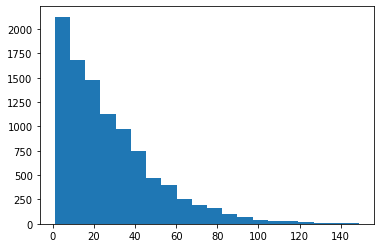

In [53]:
from spacy.lang.en import English

nlp = English()
nlp.add_pipe("sentencizer")

# the number of paragraphs read so far.
count = 0
# stores the length of each sentence processed so far.
lengths = []
with open('../data/melville-moby_dick.txt', 'r') as f:
    # YOUR CODE GOES HERE
    docData = f.read()
    paragraphData = re.split(r'\n\n+',docData)
    while (count <= 1000):
        for pdata in paragraphData:
            count += 1
            doc = nlp(pdata)
            for sent in doc.sents:
                tokCounter = 0
                for tok in sent:
                    tokCounter += 1
                lengths.append(tokCounter)
    
len150 = [l for l in lengths if l <= 150]
plt.hist(len150, bins = 20)
plt.show()

Note the difference between the two histograms. Identify at least 5 examples of sentences in Moby Dick that are segmented differently by the two approaches. Copy them below and explain the differences. Which method seems to be more accurate?

We can note from the above histograms some details which could prove useful in our analysis:
The curve that the matplotlib library generates for the case using the classical approach of token segmentation is very steep, whereas the one generated for the case using a sentencizer added to the processing pieline only shows a gradually decreasing trend.

Approach 1 talks about the classical approach using regex for sentence segmentation.
Approach 2 talks about spaCy's approach using the sentencizer pipe.

Instances from the Moby Dick Text where sentences are parsed differently by the 2 approaches
1. "WHALE. ... Sw. and Dan. HVAL.  This animal is named from roundness\n or rolling; for in Dan. HVALT is arched or vaulted."

In approach 1, it is parsed as 
WHALE -> token1
 (whitespace) -> token2
Sw -> token3
and Dan -> token4

In approach 2, it is parsed as
WHALE. ... -> token1
Sw. and Dan. -> token2

2. "WHALE. ... It is more immediately from the Dut. and Ger. WALLEN;\n A.S. WALW-IAN, to roll, to wallow."
Like in the previous instance, approach 1 parses this sentence into tokens using the period symbol '.' as de-limiter.

In approach 2, it is parsed as
WHALE. ... -> token1
It is more immediately from the Dut. and Ger. -> token2 and so on
Note that, the component words Dut. and Ger. of the above sentence are parsed separately in approach 1.

3. "Io!  Paean!  Io! sing."

In approach 1, it is parsed as
Io -> token1
Paean -> token2
Io -> token3
sing -> token4

In approach 2, it is parsed as
Io! Paean! Io!  -> token1
sing -> token2
Note in this case that exclamatory symbols have not been used as a de-limiter in spacy's segmentation approach

4. "My God!  Mr. Chace, what is the matter?"  I answered, "we have been \nstove by a whale."
This is on the similar lines as in instance 3. The segmentation in approach2 is very similar to the way it happens in instance 3

5. "Give it up, Sub-Subs!  For by how much the more\npains ye take to please the world, by so much the more shall ye for\n ever go thankless!  Would that I could clear out Hampton Court and\n the Tuileries for ye!"
The token extraction methodology, followed by approach 2, even in this instance is similar to that in instance 3.


Overall, what we can say about the way spaCy's sentencizer works, is that, it seems to be a better fit to be of use, when we have problem statements that deal with tokenization methods that go hand-in-hand with run time efficiency(taking less time to run). So, spaCy's sentencizer generates more accurate results.

In [ ]:
import re
import spacy
import matplotlib.pyplot as plt
nlp = spacy.load("en_core_web_sm")

# the number of paragraphs read so far.
count = 0 
# stores the length of each sentence processed so far.
lengths = []
# make sure the file is read line by line.
with open('../data/melville-moby_dick.txt', 'r') as f:
    # YOUR CODE GOES HERE
    i = 0
    
    docData = f.read()
    paragraphData = re.split(r'\n\n+',docData)
    while (count <= 1000):
        for pdata in paragraphData:
            count += 1
            sentence = re.split(r' *[\.\?!][\'"\)\]]* *',pdata)
            for sent in sentence:
                if(i < 250):
                    print(sent, end = '*sentence----end app1*\n')
                    i += 1
    


In [ ]:
import re
import spacy
import matplotlib.pyplot as plt
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("sentencizer")

# the number of paragraphs read so far.
count = 0 
# stores the length of each sentence processed so far.
lengths = []
# make sure the file is read line by line.
with open('../data/melville-moby_dick.txt', 'r') as f:
    # YOUR CODE GOES HERE
    i = 0
    
    docData = f.read()

    paragraphData = re.split(r'\n\n+',docData)
    while (count <= 1000):
        for pdata in paragraphData:
            count += 1
            doc = nlp(pdata)
            for sent in doc.sents:
                if(i< 250):
                    print(sent, end = '*sentence----end app2*\n')
                    i += 1

**[Bonus points]** Anything extra goes here.

The lines of code used in the above 2 cells were used as comparator modules for performing the comparison between the classical regex sentencizer and spaCy's sentencizer. An attempt was made to compare the first 250 sentences parsed using 2 different lexical styles